In [41]:
from pathlib import Path
from lagom.experiment import Configurator
from lagom.utils import pickle_load
from lagom.vis import CurvePlot


def load_loggings(log_folder, ID, f):
    p = Path(log_folder)/str(ID)
    
    out = []
    for seed_folder in p.iterdir():
        if seed_folder.is_dir() and (seed_folder/f).exists():
            out.append(pickle_load(seed_folder/f))
            
    return out


def get_items(loggings, key):
    out = []
    
    for logging in loggings:
        items = [x[key][0] for x in logging]
        out.append(items)
        
    return out

In [51]:
log_folder = Path(f'logs/default/')
configs = Configurator.to_dataframe(pickle_load(log_folder/'configs.pkl'))
configs

,ID,cuda,env.id,env.standardize,env.time_aware_obs,network.recurrent,network.hidden_sizes,network.independent_V,algo.lr,algo.lr_V,...,agent.constant_std,agent.std_state_dependent,agent.init_std,train.timestep,train.N,train.ratio_T,eval.independent,eval.N,log.interval,log.dir
0,0,True,HalfCheetah-v2,True,False,False,"[64, 64]",False,0.0007,0.001,...,None,False,0.5,1000000.0,1,1.0,False,10,10,logs/default


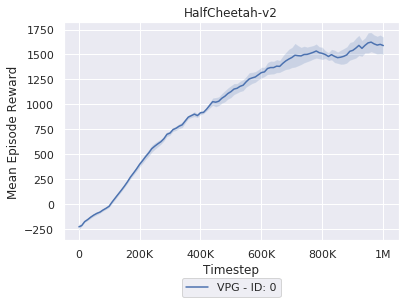

In [52]:
env_id = configs['env.id'][0]
hyparam = 'ID'

plot = CurvePlot()
x_key = 'accumulated_trained_timesteps'
y_key = 'running_mean_return'
ylabel = 'Mean Episode Reward'
#y_key = 'explained_variance'
#ylabel = 'Explained Variance'

IDs = list(configs['ID'])
for ID in IDs:
    loggings = load_loggings(log_folder, ID, 'train_logs.pkl')
    x = get_items(loggings, x_key)
    y = get_items(loggings, y_key)
    plot.add(f'VPG - {hyparam}: {configs[hyparam][ID]}', y, xvalues=x)
    #plot.add(f'VPG - ID: {ID}', y, xvalues=x)

ax = plot(title=f'{env_id}', 
          xlabel='Timestep', 
          ylabel=ylabel, 
          num_tick=6, 
          xscale_magnitude=None, 
          scales=[0.5], 
          alphas=[0.2])
legend = ax.legend(loc='upper center', bbox_to_anchor=[0.5, -0.15], ncol=2)
ax.figure.savefig(log_folder/'result.png', bbox_extra_artists=(legend,), bbox_inches='tight')

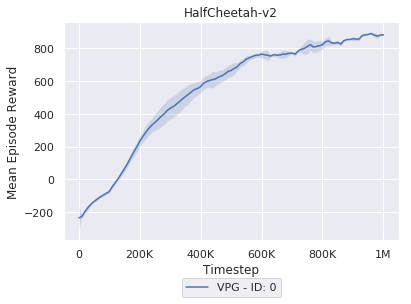

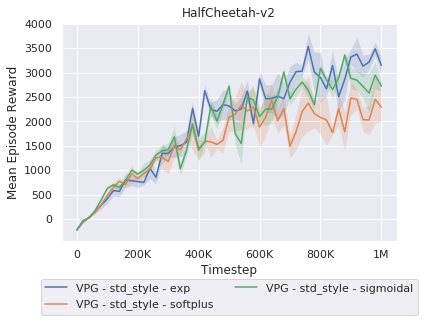

In [45]:
#plot.add('VPG', [f(y, window_length=51, polyorder=7) for y in y_values], xvalues=x_values)
ax = plot(title=f'{env_id}', 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None, 
          scales=[0.5], 
          alphas=[0.2])
ax.legend(loc='upper center', bbox_to_anchor=[0.5, -0.15], ncol=2)

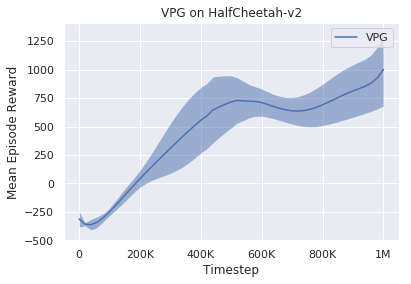